In [24]:
import pandas as pd
import os

from skimage.transform import resize
from skimage.io import imread

import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import rotate

In [25]:
ages = ['30','45','60', '180', '330', '720']
flat_data_arr = []
target_arr = []

for i in ages:
    print(f'age : {i} days')
    path=os.path.join(r'Good RPE Crops',i)
    
    for img in os.listdir(path):
        flip_arr = []
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        
        flat_data_arr.append(img_resized.flatten())
        flip_arr.append(img_resized)
        target_arr.append(ages.index(i))

        if i in ['30', '45', '60', '720']:
            for j in [90, 180, 270]:
                r = rotate(img_resized, j)
                flat_data_arr.append(r.flatten())
                flip_arr.append(r)
                target_arr.append(ages.index(i))

        if i in ['30', '330', '720']:
            for j in flip_arr:
                f = np.flip(j, axis=0)
                flat_data_arr.append(f.flatten())
                target_arr.append(ages.index(i))

        
    print('finished')
    
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

df=pd.DataFrame(flat_data) #dataframe
df['Target']=target

x=flat_data 
y=target

age : 30 days
finished
age : 45 days
finished
age : 60 days
finished
age : 180 days
finished
age : 330 days
finished
age : 720 days
finished


<BarContainer object of 6 artists>

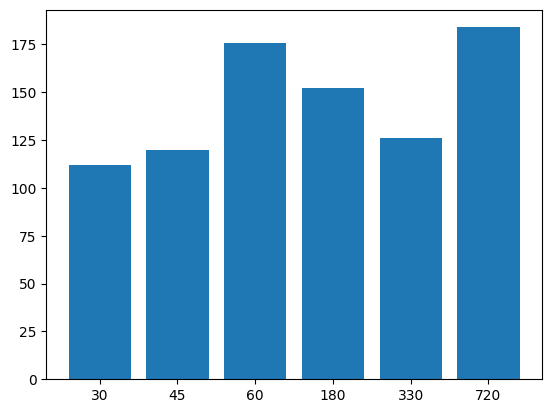

In [26]:
# displaying distribution of samples post-augmenting
test = list(y)
height = [test.count(i) for i in range(6)]
plt.bar(ages, height)

In [27]:
from sklearn import svm
model=svm.SVC(C=10, gamma=0.001)

In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, stratify=y)
print('Split Successful')

model.fit(x_train,y_train)
print('Training Successful')

Split Successful
Training Successful


In [29]:
from sklearn.metrics import accuracy_score, classification_report

y_pred=model.predict(x_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100:.4f}% accurate")
print(classification_report(y_test, y_pred, target_names=ages, zero_division=0))

The model is 72.9885% accurate
              precision    recall  f1-score   support

          30       0.75      0.68      0.71        22
          45       0.88      0.88      0.88        24
          60       0.76      0.54      0.63        35
         180       0.73      0.77      0.75        31
         330       0.73      0.88      0.80        25
         720       0.62      0.70      0.66        37

    accuracy                           0.73       174
   macro avg       0.74      0.74      0.74       174
weighted avg       0.73      0.73      0.73       174



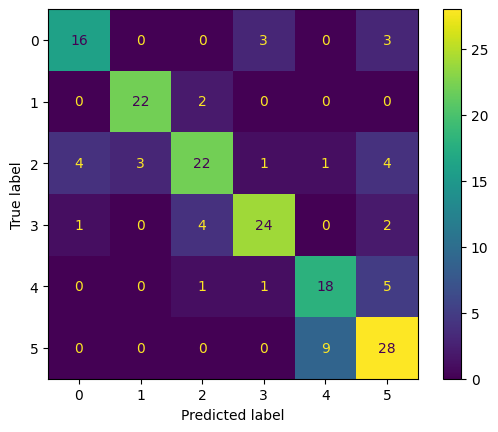

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [177]:
# saving particular case of a model
import joblib

joblib.dump(model, 'RPE_svm_model.pkl')

['RPE_svm_model.pkl']

In [200]:
# testing joblib loading

rpe_svm = joblib.load('RPE_svm_model.pkl')